### Walkthrough for Depth Reconstruction

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obj = "gourd" # test object name

reprojected_lidar_depth = np.load("data/{0}/reprojected_lidar.npy".format(obj)) # point to reprojected lidar depth
model = torch.load("data/{0}/model.pt".format(obj), map_location="cpu") # point to location of trained model
model.args.device = "cpu" # perform reconstruction on cpu
model.ref_depth = torch.tensor(reprojected_lidar_depth).float()[None, None] # use reprojected lidar depth as intialization

In [4]:
qry, out = model.get_visualization(y_samples=480, x_samples=360) # set resolution, full resolution might require large memory
out = out.detach()
qry = qry.detach()

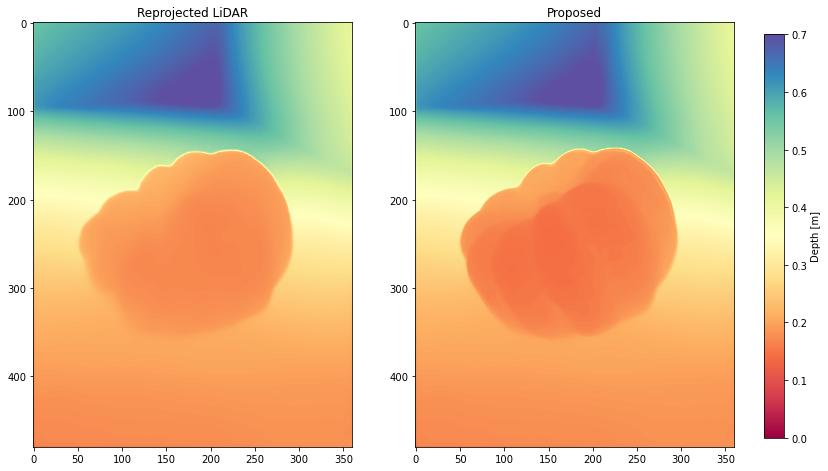

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
axes[0].imshow(qry, cmap='Spectral', vmin=0, vmax=0.7)
axes[0].set_title("Reprojected LiDAR")
im = axes[1].imshow(out, cmap='Spectral', vmin=0, vmax=0.7)
axes[1].set_title("Proposed")

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Depth [m]')
plt.show()